In [75]:
import nltk
import pandas as pd
import re

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [76]:
text = pd.read_csv('Data/dataset.csv')

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [77]:
text.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_name,script
0,12 Monkeys,Twelve MonkeysTWELVE MONKEYS An o...
1,2001 A Space Odyssey,2001: A SPACE ODYSSEY Screenplay ...
2,2012,...
3,28 Days Later,28 DAYS LATER ...
4,9,...


In [78]:
text.dropna(inplace=True)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [79]:
text.info()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 165 entries, 0 to 167
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   movie_name  165 non-null    object
 1   script      165 non-null    object
dtypes: object(2)
memory usage: 3.9+ KB


# pre-processing

In [80]:
import nltk
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.stem import WordNetLemmatizer

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


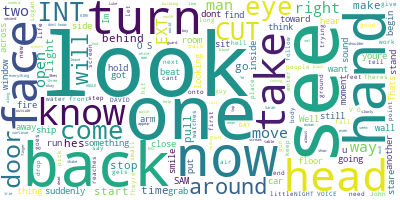

In [123]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(text['script'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [124]:
stop_words = stopwords.words('english')
stop_words.extend(['int','ext','im','one','contd','hand','door','room','cut','dont','look'])

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [125]:
#stop_words

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [126]:
nltk.download('punkt')

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package punkt to /home/anna/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [127]:
def tokenize_list(texts):
    word_list = []
    for item in range(len(texts)):
        
        word_list.append(nltk.word_tokenize(texts[item]))
    return word_list

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

def lemmatize(text):
    lemmatizer = WordNetLemmatizer()
    for item in range(len(text)):
        text[item]=  [lemmatizer.lemmatize(w,pos='v') for w in text[item]]
        
    return text

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [128]:
text_list = tokenize_list(text.script.tolist())
text_list = remove_stopwords(text_list)
text_list = lemmatize(text_list)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [129]:
len(text_list)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


165

In [130]:
import gensim.corpora as corpora

# Create dictionary
id2word = corpora.Dictionary(text_list)


# Create corpus: Word frequency 
corpus = [id2word.doc2bow(text) for text in text_list]

# View
print(corpus[:1][0][:30])

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0, 3), (1, 1), (2, 1), (3, 4), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 4), (14, 2), (15, 2), (16, 1), (17, 1), (18, 1), (19, 2), (20, 3), (21, 1), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 15)]


In [131]:
from tqdm import tqdm
from gensim.models.ldamulticore import LdaMulticore
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [132]:
from pprint import pprint
# number of topics
num_topics = 3

# Build LDA model
lda_model = LdaMulticore(corpus=corpus,
                        id2word=id2word,
                        num_topics=num_topics, 
                        random_state=42)

# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(0,
  '0.006*"go" + 0.006*"get" + 0.005*"look" + 0.005*"see" + 0.004*"back" + '
  '0.004*"like" + 0.004*"come" + 0.004*"know" + 0.004*"take" + 0.004*"turn"'),
 (1,
  '0.007*"look" + 0.007*"see" + 0.007*"back" + 0.007*"get" + 0.006*"go" + '
  '0.004*"like" + 0.004*"know" + 0.004*"take" + 0.004*"come" + 0.004*"turn"'),
 (2,
  '0.007*"get" + 0.006*"back" + 0.006*"go" + 0.005*"look" + 0.005*"like" + '
  '0.004*"see" + 0.004*"come" + 0.004*"know" + 0.003*"turn" + 0.003*"open"')]


In [133]:
# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=text_list, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Coherence Score:  0.24055847702347447


In [134]:
import pickle 
import pyLDAvis
import pyLDAvis.gensim_models
import os

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('Data/prepared_'+str(num_topics))

# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim_models.prepare(lda_model, corpus, id2word, sort_topics=False)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

pyLDAvis.save_html(LDAvis_prepared, 'Data/prepared_'+ str(num_topics) +'.html')

LDAvis_prepared

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/anna/anaconda3/lib/python3.8/site-packages/pyLDAvis/_prepare.py:246: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  default_term_info = default_term_info.sort_values(


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.003842 -0.001134       1        1  42.670945
1      0.002960 -0.002578       2        1  32.207402
2      0.000882  0.003712       3        1  25.121653, topic_info=         Term          Freq         Total Category  logprob  loglift
376      back  12485.000000  12485.000000  Default  30.0000  30.0000
1762      get  13847.000000  13847.000000  Default  29.0000  29.0000
2547     look  12923.000000  12923.000000  Default  28.0000  28.0000
3787      see  12020.000000  12020.000000  Default  27.0000  27.0000
14009     sam   2658.000000   2658.000000  Default  26.0000  26.0000
...       ...           ...           ...      ...      ...      ...
280    around   1426.306016   6457.132523   Topic3  -5.9389  -0.1287
4072    stand   1187.605904   4808.153029   Topic3  -6.1220  -0.0169
365      away   1262.363972   5412.216006   Topic3  -6.0610  -0.0742
4652      two   1184.776479   5434.971081   Topic3  -6.1244  -0.1419
1094      day   1204.857204   6117.429551   Topic3  -6.1076  -0.2433

[287 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
11927      1  0.227462      abby
11927      2  0.318447      abby
11927      3  0.449869      abby
66185      1  0.184819  ackerman
66185      2  0.628384  ackerman
...      ...       ...       ...
64557      2  0.164418    xanadu
64557      3  0.164418    xanadu
5073       1  0.422839     youre
5073       2  0.314855     youre
5073       3  0.262179     youre

[597 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3])

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


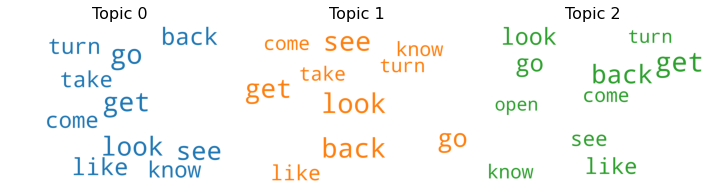

In [135]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(1, 3, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

In [136]:
topic_scores = [[topic_score[1] for topic_score in sent] for sent in doc_lda]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [137]:
df_topics = pd.DataFrame(topic_scores)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [138]:
df_topics.fillna(0,  inplace=True)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [139]:
df_topics.loc[4,:]   #scores dos topicos do script 4 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0    0.714540
1    0.274629
2    0.010831
Name: 4, dtype: float64

# Dataframe concat
## Concatenating the dataset with the raw script and the movie name (df_parcial) with Dataframe with scores of each topic (df_topics)

In [140]:
df_concat = pd.concat([text, df_topics], axis=1) 

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [141]:
df_concat.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_name,script,0,1,2
0,12 Monkeys,Twelve MonkeysTWELVE MONKEYS An o...,0.657004,0.333385,0.000000
1,2001 A Space Odyssey,2001: A SPACE ODYSSEY Screenplay ...,0.012915,0.883567,0.103518
2,2012,...,0.311166,0.588064,0.100770
3,28 Days Later,28 DAYS LATER ...,0.951329,0.046018,0.000000
4,9,...,0.714540,0.274629,0.010831


In [142]:
topics = df_concat.loc[:, [0, 1, 2]]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [143]:
df_concat['Topic'] = topics.idxmax(axis=1)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [144]:
df_concat.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_name,script,0,1,2,Topic
0,12 Monkeys,Twelve MonkeysTWELVE MONKEYS An o...,0.657004,0.333385,0.000000,0.0
1,2001 A Space Odyssey,2001: A SPACE ODYSSEY Screenplay ...,0.012915,0.883567,0.103518,1.0
2,2012,...,0.311166,0.588064,0.100770,1.0
3,28 Days Later,28 DAYS LATER ...,0.951329,0.046018,0.000000,0.0
4,9,...,0.714540,0.274629,0.010831,0.0


In [145]:
df_concat[df_concat['Topic'].isna()]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_name,script,0,1,2,Topic
165,"X Files Fight the Future, The","""The X Files"", production draft, by Chris C...",NaN,NaN,NaN,NaN
166,X Men,"""X-MEN"" -- early draft by Ed Solomon, Chris Mc...",NaN,NaN,NaN,NaN
167,X Men Origins Wolverine,X-MEN ORIGINS: WO...,NaN,NaN,NaN,NaN


In [146]:
df_concat.dropna(subset=['Topic'], how='all', inplace=True)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [147]:
df_concat[df_concat['Topic'].isna()]

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_name,script,0,1,2,Topic


In [148]:
df_concat[['Topic']] = df_concat[['Topic']].astype(int)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [149]:
df_concat.head()

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,movie_name,script,0,1,2,Topic
0,12 Monkeys,Twelve MonkeysTWELVE MONKEYS An o...,0.657004,0.333385,0.000000,0
1,2001 A Space Odyssey,2001: A SPACE ODYSSEY Screenplay ...,0.012915,0.883567,0.103518,1
2,2012,...,0.311166,0.588064,0.100770,1
3,28 Days Later,28 DAYS LATER ...,0.951329,0.046018,0.000000,0
4,9,...,0.714540,0.274629,0.010831,0


In [150]:
df_concat.to_csv('Data/df_concat.csv',  sep=';',index=False)

/home/anna/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
